In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute
from qiskit import execute, Aer, BasicAer, IBMQ
from qiskit.circuit import Gate
from qiskit.tools.visualization import plot_histogram
from qiskit.providers.aer import QasmSimulator
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
import numpy as np
from matplotlib import pyplot as plt

In [2]:
q0 = QuantumRegister(5, 'q0')
switch = QuantumCircuit(q0, name="Switch")

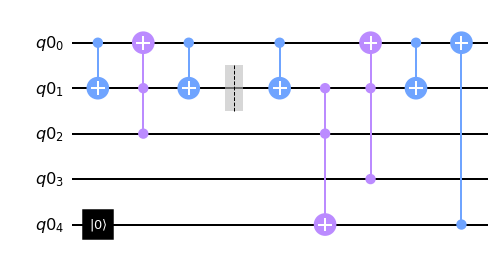

In [3]:
switch.reset(q0[4])
switch.cx(q0[0],q0[1])
switch.ccx(q0[2],q0[1],q0[0])
switch.cx(q0[0],q0[1])
switch.barrier(q0[1])
switch.cx(q0[0],q0[1])
switch.ccx(q0[1],q0[2],q0[4])
switch.ccx(q0[3],q0[1],q0[0])
switch.cx(q0[0],q0[1])
switch.cx(q0[4],q0[0])


switch.draw(output='mpl')

In [4]:
q9 = QuantumRegister(5, 'q9')
q8 = QuantumRegister(5, 'q8')
q7 = QuantumRegister(5, 'q7')
q6 = QuantumRegister(5, 'q6')
c = ClassicalRegister(8, 'c')

a0 = QuantumCircuit(q9,q8,q7,q6,c)

In [5]:
inp1 = []

for i in range(0,8):
    inp = input("Enter I{}: ".format(i))
    inp1.append(inp)
    
if inp1[0] == "1":
    a0.x(q9[0])
if inp1[1] == "1":
    a0.x(q9[1])
if inp1[2] == "1":
    a0.x(q8[0])
if inp1[3] == "1":
    a0.x(q8[1])
if inp1[4] == "1":
    a0.x(q7[0])
if inp1[5] == "1":
    a0.x(q7[1])
if inp1[6] == "1":
    a0.x(q6[0])
if inp1[7] == "1":
    a0.x(q6[1])
    
    
inp2  = input("Enter C0: ")
inp3  = input("Enter C1: ")

if inp2 == "1":
    a0.x(q9[2])
if inp3 == "1":
    a0.x(q9[3])
if inp2 == "1":
    a0.x(q8[2])
if inp3 == "1":
    a0.x(q8[3])
if inp2 == "1":
    a0.x(q7[2])
if inp3 == "1":
    a0.x(q7[3])
if inp2 == "1":
    a0.x(q6[2])
if inp3 == "1":
    a0.x(q6[3])

Enter I0: 1
Enter I1: 0
Enter I2: 1
Enter I3: 0
Enter I4: 1
Enter I5: 0
Enter I6: 1
Enter I7: 0
Enter C0: 1
Enter C1: 1


In [6]:
register = switch.to_instruction()

In [7]:
a0.append(register, [q9[0],q9[1],q9[2],q9[3],q9[4]])
a0.append(register, [q8[0],q8[1],q8[2],q8[3],q8[4]])
a0.append(register, [q7[0],q7[1],q7[2],q7[3],q7[4]])
a0.append(register, [q6[0],q6[1],q6[2],q6[3],q6[4]])

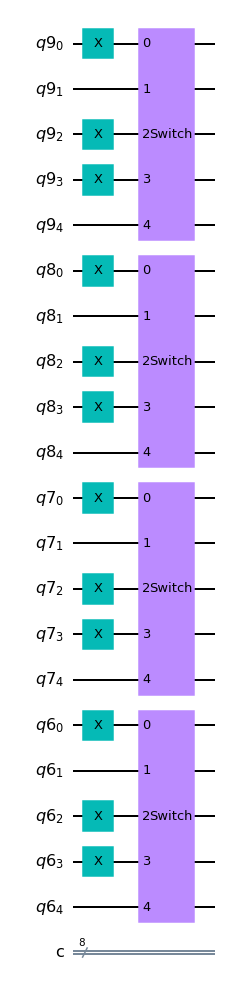

In [8]:
a0.draw(output='mpl')

In [9]:
a0.measure(q9[0],c[0])
a0.measure(q9[1],c[1])
a0.measure(q8[0],c[2])
a0.measure(q8[1],c[3])
a0.measure(q7[0],c[4])
a0.measure(q7[1],c[5])
a0.measure(q6[0],c[6])
a0.measure(q6[1],c[7])

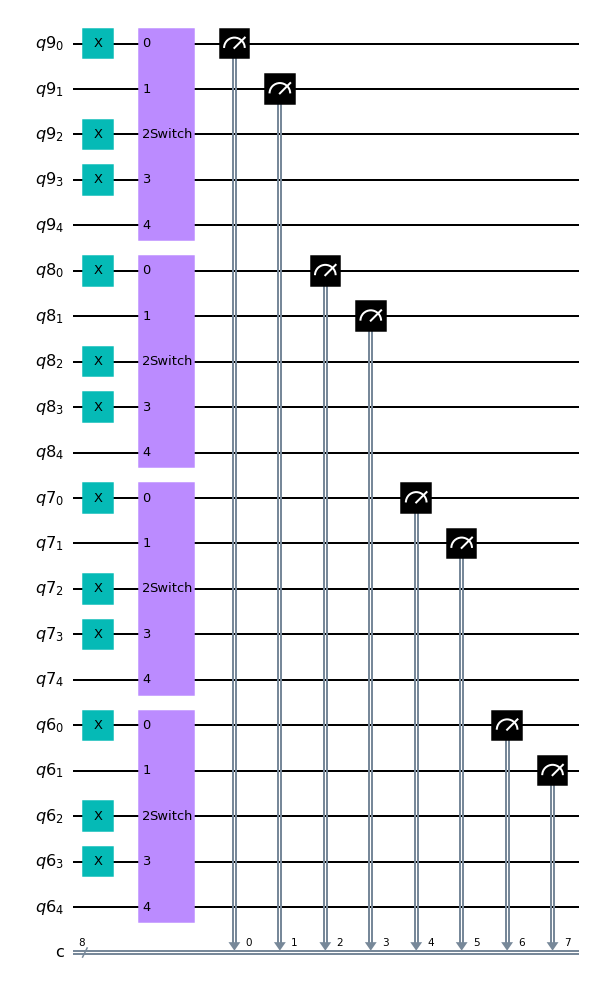

In [10]:
a0.draw(output='mpl')

In [11]:
simulator = QasmSimulator()

In [12]:
result = execute(a0, backend=simulator).result()

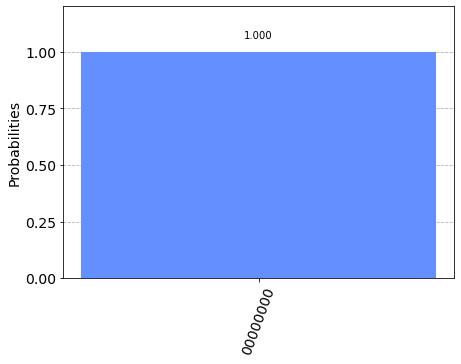

In [13]:
plot_histogram(result.get_counts(a0))